In [192]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression

In [193]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [194]:
df= df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


(array([  1.,   0.,   3.,   5.,   1.,   4.,   6.,  10.,   8.,   5.,   5.,
         10.,  19.,  17.,  25.,  31.,  31.,  23.,  36.,  49.,  64.,  58.,
         70.,  74.,  94.,  98., 117., 132., 130., 151., 175., 182., 206.,
        198., 218., 215., 253., 256., 284., 272., 275., 286., 303., 304.,
        283., 299., 326., 289., 272., 276., 288., 252., 253., 227., 217.,
        221., 197., 195., 153., 162., 118., 123., 115., 108.,  94.,  87.,
         78.,  57.,  45.,  36.,  40.,  34.,  34.,  18.,  19.,  16.,   9.,
          8.,   7.,   9.,   5.,   7.,   7.,   2.,   6.,   2.,   2.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 6.20097053,  6.39863305,  6.59629556,  6.79395808,  6.99162059,
         7.18928311,  7.38694562,  7.58460814,  7.78227065,  7.97993317,
         8.17759568,  8.3752582 ,  8.57292072,  8.77058323,  8.96824575,
         9.16590826,  9.36357078,  9.56123329,  9.75889581,  9.95655832,
        10.15422084, 10.35

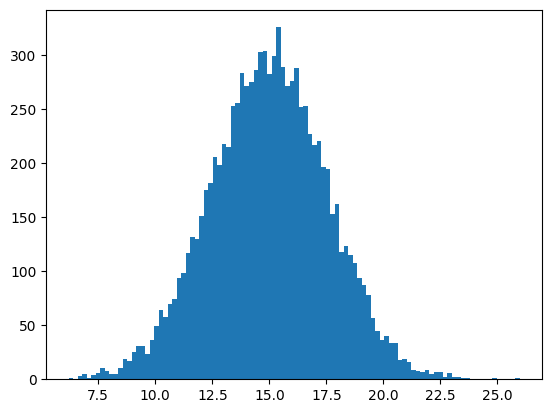

In [195]:
import matplotlib.pyplot as plt 
plt.hist(df.fuel_efficiency_mpg, bins= 100)

In [196]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [197]:
df.horsepower.median()

np.float64(149.0)

In [198]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [199]:
# index = np.arange(len(df))
# np.random.seed(42)
# np.random.shuffle(index)
# df= df.iloc[index]
# df

In [200]:
# df = df.reset_index(drop= True)
# df

In [201]:
# from sklearn.model_selection import train_test_split
# X= df.drop('fuel_efficiency_mpg', axis=1)
# y= df.fuel_efficiency_mpg

# X_full_train , X_test , y_full_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# X_train , X_val , ytrain , y_val = train_test_split(X_full_train,y_full_train,test_size=0.25, random_state=42)
# len(X_train) , len(X_val) , len(X_test)

In [202]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [203]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
5819,160,156.0,2990.334203,2020,15.294958
5820,240,105.0,3495.100812,2014,12.426054
5821,210,171.0,3434.252180,2011,12.509291
5822,180,172.0,2967.708852,2018,14.746571


In [204]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [205]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,16.964054
5820,280,132.0,4004.214323,2014,10.059094
5821,210,152.0,2500.175687,2020,17.593237
5822,250,154.0,2254.313245,2002,18.925748


In [206]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [207]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]





In [208]:
X_train = df_train.drop('fuel_efficiency_mpg' , axis=1)
X_val = df_val.drop('fuel_efficiency_mpg' , axis=1)
X_test = df_test.drop('fuel_efficiency_mpg' , axis=1)
X_test

,engine_displacement,horsepower,vehicle_weight,model_year
0,140,148.0,2704.826005,2017
1,210,136.0,3001.227490,2004
2,210,152.0,3747.467392,2021
3,190,128.0,2705.833636,2014
4,230,156.0,2505.939657,2005
...,...,...,...,...
1935,210,163.0,1972.029124,2011
1936,160,126.0,3011.588014,2009
1937,290,187.0,2440.508039,2019
1938,260,129.0,1865.404480,2019


In [209]:
X_train_fz = X_train.copy()
X_train_fz.loc[:, 'horsepower'] = X_train_fz.horsepower.fillna(0)
X_train_fz.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [210]:
X_val_fz = X_val.copy()
X_val_fz.loc[:, 'horsepower'] = X_val_fz.horsepower.fillna(0)
X_val_fz.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [211]:
w0, w = train_linear_regression(X_train_fz, y_train)

y_pred = w0 + X_val_fz.dot(w)

In [212]:
y_pred

0       16.037338
1       14.925222
2       11.864459
3       16.118236
4        9.452563
          ...    
1935    13.212633
1936    16.300389
1937    13.695609
1938    13.625751
1939    16.449368
Length: 1940, dtype: float64

In [213]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [214]:
rmse(y_val, y_pred)

np.float64(0.5173782638857467)

In [215]:
X_train_fmean = X_train.copy()
X_train_fmean.loc[:, 'horsepower'] = X_train_fmean.horsepower.fillna(X_train_fmean.horsepower.mean())
X_train_fmean.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [216]:
X_val_fmean = X_val.copy()
X_val_fmean.loc[:, 'horsepower'] = X_val_fmean.horsepower.fillna(X_train_fmean.horsepower.mean())
X_val_fmean.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [217]:
w0, w = train_linear_regression(X_train_fmean, y_train)

y_pred2 = w0 + X_val_fmean.dot(w)

y_pred2

0       15.738375
1       14.803383
2       12.036249
3       15.772093
4        9.924856
          ...    
1935    13.547392
1936    16.325909
1937    14.014826
1938    13.721614
1939    16.193629
Length: 1940, dtype: float64

In [218]:
rmse(y_val, y_pred2)

np.float64(0.46359650423506327)

In [219]:
X_train = X_train.copy()
X_train.loc[:, 'horsepower'] = X_train.horsepower.fillna(0)

X_val = X_val.copy()
X_val.loc[:, 'horsepower'] = X_val.horsepower.fillna(0)


In [220]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [221]:

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w =train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)
    print()

0 28.827365475106156 0.5173782638857467

0.01 24.92683842008767 0.5171115525767522

0.1 11.239661084961272 0.5187525130701821

1 1.7315979411936366 0.5222348802092772

5 0.3638075020692219 0.5228916092823478

10 0.18306246622306527 0.5229812979636581

100 0.018418017306977234 0.5230636233819926



In [225]:
RMSE_scores = []

for rseed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(rseed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]



    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg
    y_val = df_val.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg


    X_train = df_train.drop('fuel_efficiency_mpg' , axis=1)
    X_val = df_val.drop('fuel_efficiency_mpg' , axis=1)
    X_test = df_test.drop('fuel_efficiency_mpg' , axis=1)

    X_train = X_train.copy()
    X_train.loc[:, 'horsepower'] = X_train.horsepower.fillna(0)

    X_val = X_val.copy()
    X_val.loc[:, 'horsepower'] = X_val.horsepower.fillna(0)

    w0, w= train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    RMSE_scores.append(score)
RMSE_scores   

[np.float64(0.5206531296292951),
 np.float64(0.5213388912860217),
 np.float64(0.5228069974785726),
 np.float64(0.5159516741108942),
 np.float64(0.5109129460108117),
 np.float64(0.5283406460133415),
 np.float64(0.5313910658151165),
 np.float64(0.5090670387365963),
 np.float64(0.5147399129426932),
 np.float64(0.5131865908408015)]

In [226]:
round(np.std(RMSE_scores) , 3)

np.float64(0.007)

In [228]:
    idx = np.arange(n)
    np.random.seed(9)
    np.random.shuffle(idx)
    df_full_train = df.iloc[idx[:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]



    df_full_train = df_full_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_full_train = df_full_train.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg


    X_full_train = df_full_train.drop('fuel_efficiency_mpg' , axis=1)
    X_test = df_test.drop('fuel_efficiency_mpg' , axis=1)

    X_full_train = X_full_train.copy()
    X_full_train.loc[:, 'horsepower'] = X_full_train.horsepower.fillna(0)

    X_test = X_test.copy()
    X_test.loc[:, 'horsepower'] = X_test.horsepower.fillna(0)

    w0, w= train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

    y_pred = w0 + X_test.dot(w)

    score = rmse(y_test, y_pred)
    print(score)

0.5156261299167999
